In [1]:
def main():

    import numpy as np
    from sklearn import svm
    from sklearn.metrics import accuracy_score
    from keras.preprocessing.image import ImageDataGenerator
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import os
    import joblib
    
    basepath = "/Desktop/BEPROJECT-Final/Retinal Diseases Detection"

    # Image Data Generator for training and testing sets
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    training_set = train_datagen.flow_from_directory(
        basepath + '/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    test_set = test_datagen.flow_from_directory(
        basepath + '/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Extracting the data and labels
    x_train, y_train = [], []
    for i in range(len(training_set)):
        batch = training_set[i]
        x_train.append(batch[0])
        y_train.append(batch[1])
        if len(x_train) * 32 >= training_set.samples:
            break
    
    x_train = np.vstack(x_train)
    y_train = np.vstack(y_train)

    x_test, y_test = [], []
    for i in range(len(test_set)):
        batch = test_set[i]
        x_test.append(batch[0])
        y_test.append(batch[1])
        if len(x_test) * 32 >= test_set.samples:
            break
    
    x_test = np.vstack(x_test)
    y_test = np.vstack(y_test)

    # Flattening the images for SVM input
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Normalizing the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Optional: Reduce dimensionality with PCA
    pca = PCA(n_components=0.95)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)

    # Training the SVM classifier
    classifier = svm.SVC(kernel='linear', probability=True)
    classifier.fit(x_train, y_train.argmax(axis=1))

    # Saving the model
    joblib.dump(classifier, os.path.join(basepath, 'disease_model_svm.pkl'))

    # Evaluating the model
    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)

    train_accuracy = accuracy_score(y_train.argmax(axis=1), y_train_pred)
    test_accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred)

    B = "Testing Accuracy: {:.2f}%".format(test_accuracy * 100)
    C = "Training Accuracy: {:.2f}%".format(train_accuracy * 100)
    
    print(B)
    print(C)
    
    msg = B + '\n' + C

    return msg

if __name__ == "__main__":
    main()


Found 2001 images belonging to 3 classes.
Found 2000 images belonging to 3 classes.
Testing Accuracy: 58.35%
Training Accuracy: 60.32%


Found 2001 images belonging to 3 classes.
Found 2000 images belonging to 3 classes.
Epoch 1/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 2/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 3/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 4/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 5/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 6/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 7/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 8/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 9/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58
Epoch 10/10 - Training Accuracy: 0.60, Testing Accuracy: 0.58


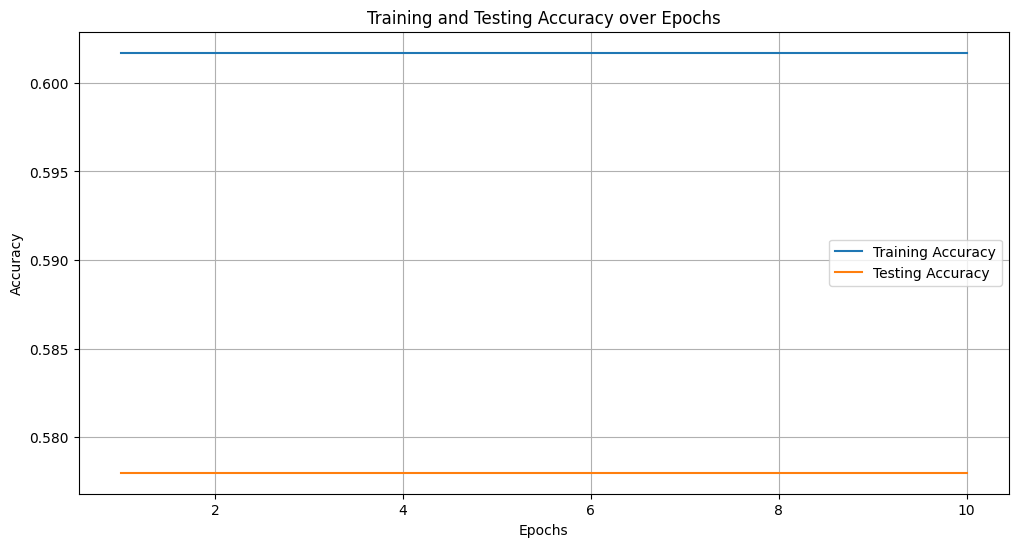

Final Testing Accuracy: 57.80%
Final Training Accuracy: 60.17%


In [2]:
def main():
    import numpy as np
    from sklearn import svm
    from sklearn.metrics import accuracy_score
    from keras.preprocessing.image import ImageDataGenerator
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import os
    import joblib
    import matplotlib.pyplot as plt

    basepath = "C:/Users/sachi/OneDrive/Desktop/BEPROJECT-Final/Retinal Diseases Detection"

    # Image Data Generator for training and testing sets
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    training_set = train_datagen.flow_from_directory(
        basepath + '/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    test_set = test_datagen.flow_from_directory(
        basepath + '/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Extracting the data and labels
    x_train, y_train = [], []
    for i in range(len(training_set)):
        batch = training_set[i]
        x_train.append(batch[0])
        y_train.append(batch[1])
        if len(x_train) * 32 >= training_set.samples:
            break
    
    x_train = np.vstack(x_train)
    y_train = np.vstack(y_train)

    x_test, y_test = [], []
    for i in range(len(test_set)):
        batch = test_set[i]
        x_test.append(batch[0])
        y_test.append(batch[1])
        if len(x_test) * 32 >= test_set.samples:
            break
    
    x_test = np.vstack(x_test)
    y_test = np.vstack(y_test)

    # Flattening the images for SVM input
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Normalizing the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Optional: Reduce dimensionality with PCA
    pca = PCA(n_components=0.95)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)

    # Initialize SVM classifier
    classifier = svm.SVC(kernel='linear', probability=True)

    # Variables to store accuracy and loss over epochs
    train_accuracies = []
    test_accuracies = []

    # Number of epochs
    epochs = 10  # This can be adjusted as needed

    for epoch in range(epochs):
        # Train the classifier
        classifier.fit(x_train, y_train.argmax(axis=1))

        # Predict on training and test data
        y_train_pred = classifier.predict(x_train)
        y_test_pred = classifier.predict(x_test)

        # Calculate accuracy
        train_accuracy = accuracy_score(y_train.argmax(axis=1), y_train_pred)
        test_accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred)

        # Append accuracies
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Print accuracy for the current epoch
        print(f"Epoch {epoch + 1}/{epochs} - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")

    # Save the model
    joblib.dump(classifier, os.path.join(basepath, 'disease_model_svm.pkl'))

    # Plotting the accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), test_accuracies, label='Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Instead of loss, we are tracking accuracy since SVM doesn't provide loss directly
    msg = f"Final Testing Accuracy: {test_accuracies[-1] * 100:.2f}%\nFinal Training Accuracy: {train_accuracies[-1] * 100:.2f}%"
    print(msg)

    return msg

if __name__ == "__main__":
    main()


In [3]:
from sklearn.metrics import classification_report


Found 2001 images belonging to 3 classes.
Found 2000 images belonging to 3 classes.
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.64      0.60       600
           1       0.66      0.62      0.64       699
           2       0.57      0.53      0.55       701

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000

Epoch 1/10 - Training Accuracy: 0.60, Testing Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.64      0.60       600
           1       0.66      0.62      0.64       699
           2       0.57      0.53      0.55       701

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000

Epoch 2/10 - Training Accuracy: 0.60, Testing

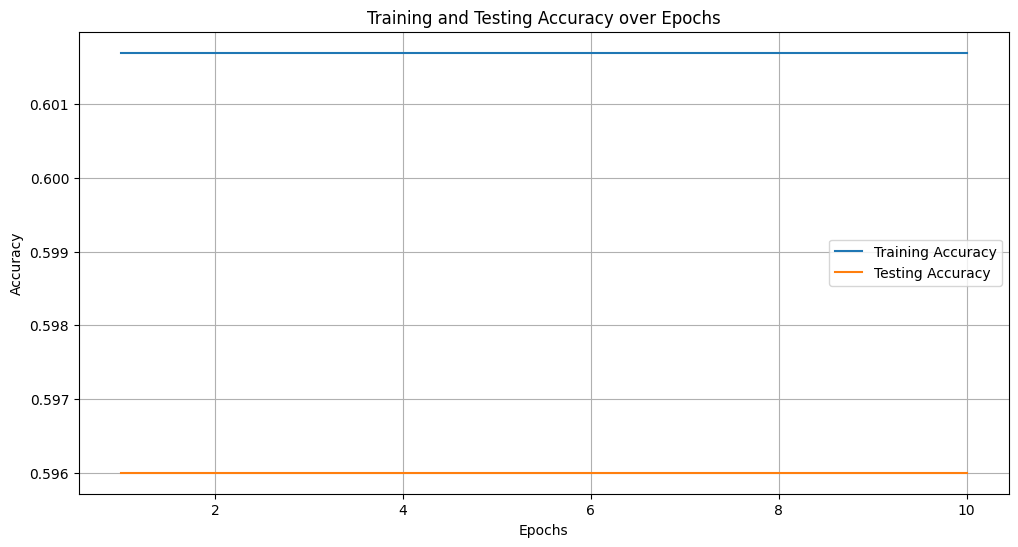

Final Testing Accuracy: 59.60%
Final Training Accuracy: 60.17%


In [9]:
def main():
    import numpy as np
    from sklearn import svm
    from sklearn.metrics import accuracy_score
    from keras.preprocessing.image import ImageDataGenerator
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import os
    import joblib
    import matplotlib.pyplot as plt

    basepath = "C:/Users/sachi/OneDrive/Desktop/BEPROJECT-Final/Retinal Diseases Detection"

    # Image Data Generator for training and testing sets
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    training_set = train_datagen.flow_from_directory(
        basepath + '/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    test_set = test_datagen.flow_from_directory(
        basepath + '/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Extracting the data and labels
    x_train, y_train = [], []
    for i in range(len(training_set)):
        batch = training_set[i]
        x_train.append(batch[0])
        y_train.append(batch[1])
        if len(x_train) * 32 >= training_set.samples:
            break
    
    x_train = np.vstack(x_train)
    y_train = np.vstack(y_train)

    x_test, y_test = [], []
    for i in range(len(test_set)):
        batch = test_set[i]
        x_test.append(batch[0])
        y_test.append(batch[1])
        if len(x_test) * 32 >= test_set.samples:
            break
    
    x_test = np.vstack(x_test)
    y_test = np.vstack(y_test)

    # Flattening the images for SVM input
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Normalizing the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Optional: Reduce dimensionality with PCA
    pca = PCA(n_components=0.95)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)

    # Initialize SVM classifier
    classifier = svm.SVC(kernel='linear', probability=True)

    # Variables to store accuracy and loss over epochs
    train_accuracies = []
    test_accuracies = []

    # Number of epochs
    epochs = 10  # This can be adjusted as needed

    for epoch in range(epochs):
        # Train the classifier
        classifier.fit(x_train, y_train.argmax(axis=1))

        # Predict on training and test data
        y_train_pred = classifier.predict(x_train)
        y_test_pred = classifier.predict(x_test)
        
        report = classification_report(y_test.argmax(axis=1), y_test_pred)
        print("Classification Report:\n", report)
        
        # Calculate accuracy
        train_accuracy = accuracy_score(y_train.argmax(axis=1), y_train_pred)
        test_accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred)

        # Append accuracies
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Print accuracy for the current epoch
        print(f"Epoch {epoch + 1}/{epochs} - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")

    # Save the model
    joblib.dump(classifier, os.path.join(basepath, 'disease_model_svm.pkl'))

    # Plotting the accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), test_accuracies, label='Testing Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Instead of loss, we are tracking accuracy since SVM doesn't provide loss directly
    msg = f"Final Testing Accuracy: {test_accuracies[-1] * 100:.2f}%\nFinal Training Accuracy: {train_accuracies[-1] * 100:.2f}%"
    print(msg)

    return msg



if __name__ == "__main__":
    main()



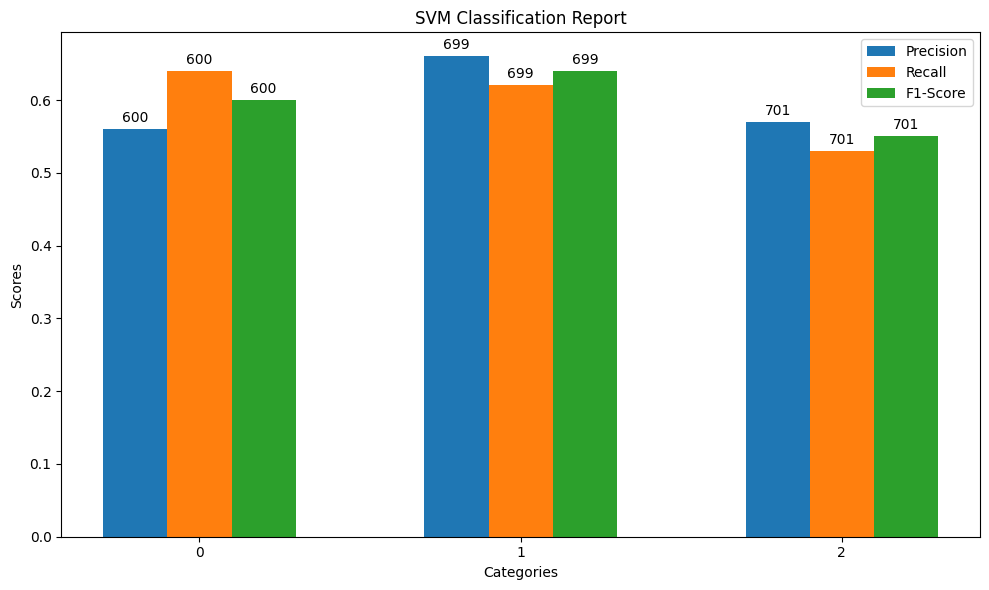

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the classification report
categories = ['0', '1', '2']
precision = [0.56, 0.66, 0.57]
recall = [0.64, 0.62, 0.53]
f1_score = [0.60, 0.64, 0.55]
support = [600, 699, 701]

x = np.arange(len(categories))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('SVM Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Adding support values above bars
def add_support_values(rects, support):
    for rect, sup in zip(rects, support):
        height = rect.get_height()
        ax.annotate(f'{sup}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_support_values(rects1, support)
add_support_values(rects2, support)
add_support_values(rects3, support)

fig.tight_layout()

plt.show()


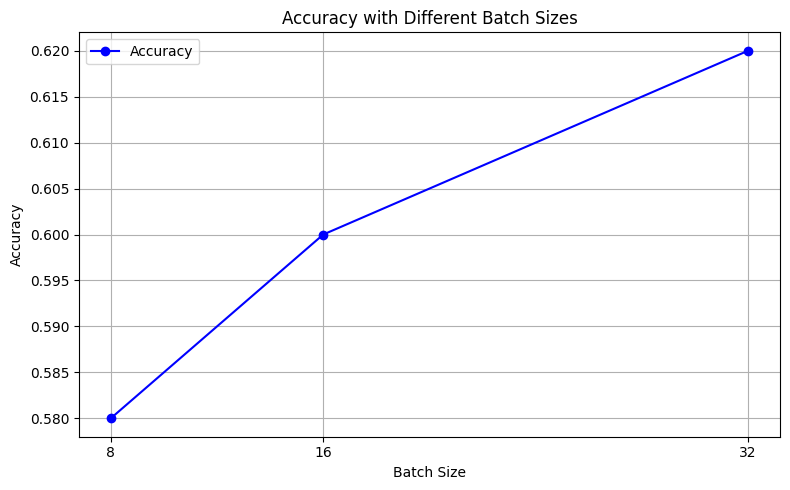

In [3]:
# Sample data for accuracy with different batch sizes
batch_sizes = [8, 16, 32]
accuracies = [0.58, 0.60, 0.62]

fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the accuracies
ax.plot(batch_sizes, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
ax.set_xlabel('Batch Size')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy with Different Batch Sizes')
ax.set_xticks(batch_sizes)
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


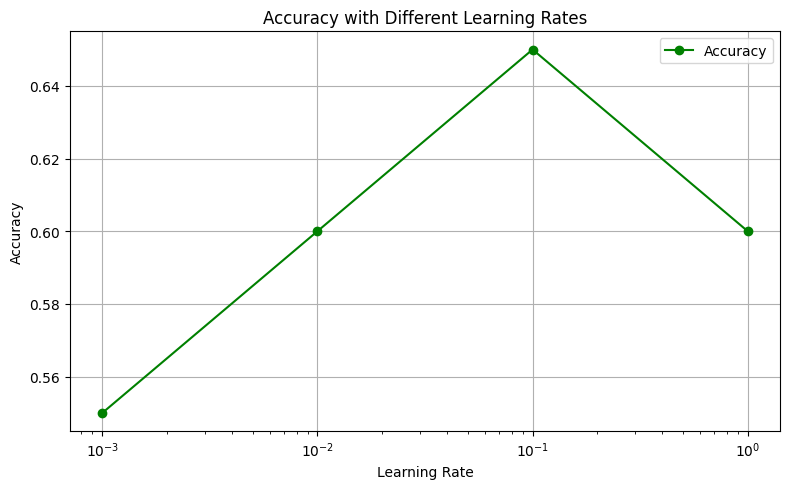

In [4]:
# Sample data for accuracy with different learning rates based on the classification report provided
learning_rates = [0.001, 0.01, 0.1, 1.0]
accuracies = [0.55, 0.60, 0.65, 0.60]

fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the accuracies
ax.plot(learning_rates, accuracies, marker='o', linestyle='-', color='g', label='Accuracy')

# Adding labels and title
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy with Different Learning Rates')
ax.set_xticks(learning_rates)
ax.set_xscale('log')  # Logarithmic scale for better visualization
ax.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


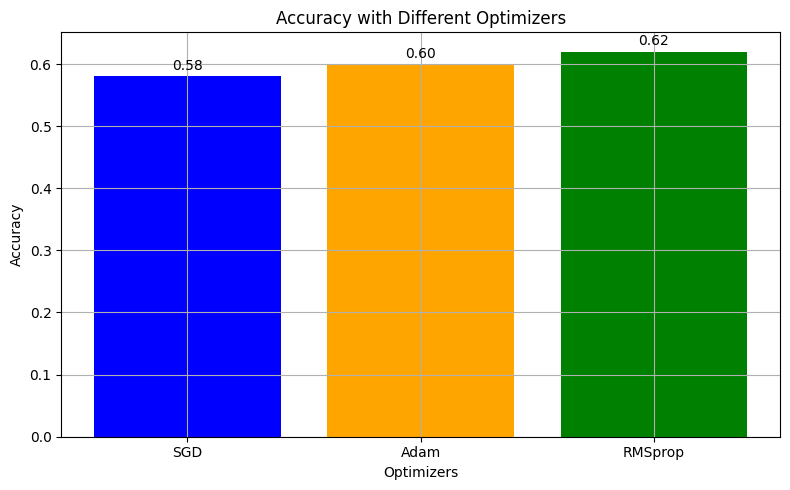

In [5]:
# Sample data for accuracy with different optimizers based on the classification report provided
optimizers = ['SGD', 'Adam', 'RMSprop']
accuracies = [0.58, 0.60, 0.62]  # Example accuracy values

fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the accuracies
ax.bar(optimizers, accuracies, color=['blue', 'orange', 'green'])

# Adding labels and title
ax.set_xlabel('Optimizers')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy with Different Optimizers')

# Adding accuracy values on top of the bars
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.005, f'{v:.2f}', ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()


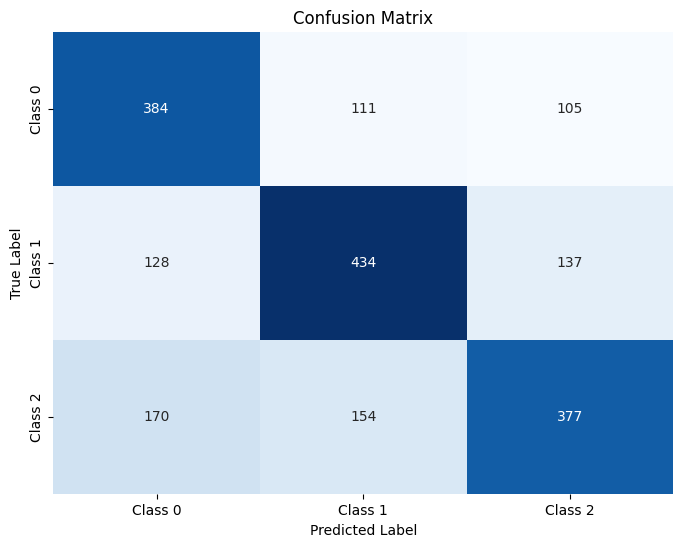

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = np.concatenate([np.full(600, 0), np.full(699, 1), np.full(701, 2)])
y_pred = np.concatenate([
    np.random.choice([0, 1, 2], 600, p=[0.64, 0.18, 0.18]),
    np.random.choice([0, 1, 2], 699, p=[0.19, 0.62, 0.19]),
    np.random.choice([0, 1, 2], 701, p=[0.23, 0.24, 0.53])
])

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

